In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from CoefPlot import CoefPlot

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# 1. Simple coefficient plot example

## 1.1 Generating some fake data

In [2]:
b = np.random.standard_normal((10))
e = 0.5*np.random.uniform(0,1,10)
df1 = pd.DataFrame([['varname {}'.format(x) for x in range(10)], b, e]).T
df1.columns = ['variable', 'coef', 'err',]
df1

,variable,coef,err
0,varname 0,-1.31876,0.182353
1,varname 1,-0.116728,0.477311
2,varname 2,0.0673839,0.025569
3,varname 3,0.862371,0.107292
4,varname 4,-0.730712,0.323743
5,varname 5,0.235376,0.408598
6,varname 6,-0.790996,0.118763
7,varname 7,0.330977,0.26937
8,varname 8,-0.167043,0.48143
9,varname 9,1.68156,0.118798


## 1.2 Coefficient plot, y-axis sorted by variable name

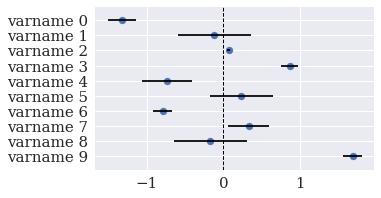

In [3]:
cp = CoefPlot(df1)
f = cp.simple_dotplot('coef', 'variable', 'err', sort_varname=True, zero_line=True, figsize=(5,3))

## 1.3 Coefficient plot, y-axis sorted by coefficient value

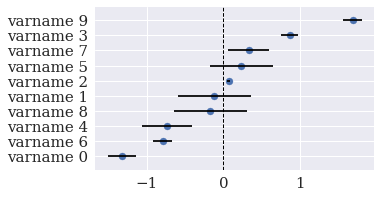

In [4]:
f = cp.simple_dotplot('coef', 'variable', 'err', sort_coefval=True, zero_line=True, figsize=(5,3))

# 2. Grouped coefficient plot example
## 2.1 Generating some fake data 

In [5]:
df2 = pd.DataFrame([sorted(2*['group {}'.format(x) for x in ['C', 'G', 'H', 'X', 'Y']]),
                    5*['varname {}'.format(x) for x in range(2)],
                    [4,4,0,0,2,2,3,3,1,1],
                    b, e]).T
df2.columns = ['group', 'variable', 'order', 'coef', 'err']
df2 = df2.sort_values('order').reset_index(drop=True).copy(deep=True)
del df2['order']
df2

,group,variable,coef,err
0,group G,varname 0,0.0673839,0.025569
1,group G,varname 1,0.862371,0.107292
2,group Y,varname 0,-0.167043,0.48143
3,group Y,varname 1,1.68156,0.118798
4,group H,varname 0,-0.730712,0.323743
5,group H,varname 1,0.235376,0.408598
6,group X,varname 0,-0.790996,0.118763
7,group X,varname 1,0.330977,0.26937
8,group C,varname 0,-1.31876,0.182353
9,group C,varname 1,-0.116728,0.477311


## 2.2 Coefficient plot, y-axis sorted by group name

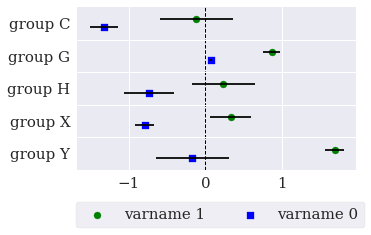

In [6]:
cp = CoefPlot(df2.copy(deep=True))
f = cp.grouped_dotplot('coef', 'variable', 'group', err='err', figsize=(5,3), 
                       order_groups_by_varlevel=None, order_groups_by_variable='group',
                       within_group_order=None, zero_line=True, 
                       group_separators=True, legend=True, legend_bbox=(-0.03,-0.4),
                       legend_columns=2)

## 2.3 Coefficient plot, y-axis sorted by value if `variable == varname0`

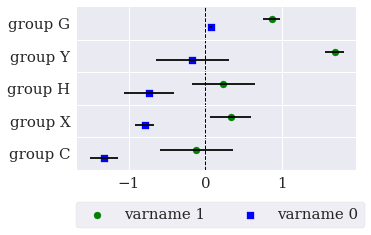

In [7]:
cp = CoefPlot(df2.copy(deep=True))
f = cp.grouped_dotplot('coef', 'variable', 'group', err='err', figsize=(5,3), 
                       order_groups_by_varlevel='varname 0', order_groups_by_variable=None,
                       within_group_order=None, zero_line=True, 
                       group_separators=True, legend=True, legend_bbox=(-0.03,-0.4),
                       legend_columns=2)

## 2.4 Coefficient plot, y-axis sorted by value if `variable == varname1`

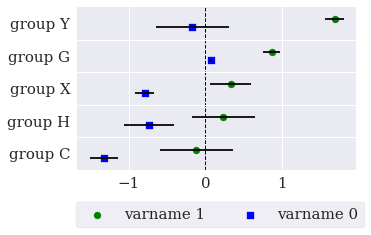

In [8]:
cp = CoefPlot(df2.copy(deep=True))
f = cp.grouped_dotplot('coef', 'variable', 'group', err='err', figsize=(5,3), 
                       order_groups_by_varlevel='varname 1', order_groups_by_variable=None,
                       within_group_order=None, zero_line=True, 
                       group_separators=True, legend=True, legend_bbox=(-0.03,-0.4),
                       legend_columns=2)

## 2.5 Coefficient plot, y-axis sorted by value if `variable == varname1`, setting within-group order, `varname 0` first (also reflected in legend)

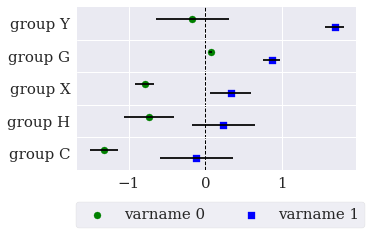

In [9]:
cp = CoefPlot(df2.copy(deep=True))
f = cp.grouped_dotplot('coef', 'variable', 'group', err='err', figsize=(5,3), 
                       order_groups_by_varlevel='varname 1', order_groups_by_variable=None,
                       within_group_order=['varname 0', 'varname 1'], zero_line=True, 
                       group_separators=True, legend=True, legend_bbox=(-0.03,-0.4),
                       legend_columns=2)

## 2.6 Coefficient plot, y-axis sorted by value if `variable == varname1`, setting within-group order, `varname 1` first (also reflected in legend)

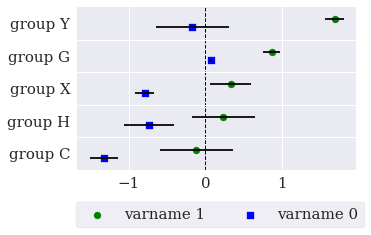

In [10]:
cp = CoefPlot(df2.copy(deep=True))
f = cp.grouped_dotplot('coef', 'variable', 'group', err='err', figsize=(5,3), 
                       order_groups_by_varlevel='varname 1', order_groups_by_variable=None,
                       within_group_order=['varname 1', 'varname 0'], zero_line=True, 
                       group_separators=True, legend=True, legend_bbox=(-0.03,-0.4),
                       legend_columns=2)